In [133]:
#import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Grades, and how to get them

In this notebook, we will try and see if a selection of variables have any influence on getting a passing grade for final exams.
These variables are:
* What role does gender play on the grades?
* How does usage of module material affect the grades of a student?
* Does the age play a role on the grades?
* Does module material type play a role on the grades?

## Basic data preparation

Before we begin, we will need to do some basic data preparation:
* Load the data
* Clean the data
* Create derived data sets
    * Student scores for final exams
    * Students final score, split by gender
    * Students final score, split by age
    * Sets students per final score
    * Total amount of clicks each student did on a module's study material
    * Total amount of clicks each student did per study material type
* Combine data sets

### Load the data

In [134]:
#read first data set assessment.csv
assessment = pd.read_csv('assessments.csv', sep=',')
courses = pd.read_csv('courses.csv', sep=',')
studentAssessment = pd.read_csv('studentAssessment.csv', sep=',')
studentInfo = pd.read_csv('studentInfo.csv', sep=',')
studentVle = pd.read_csv('studentVle.csv', sep=',')
vle = pd.read_csv('vle.csv', sep=',')


### Clean the data

Some data may be pointless. Empty values, negative values where only positive values are possible, ... . We also won't use every column in every dataframe. There may also be abnormal values. This first needs to be cleaned up so we can work with data that makes actual sense.

#### Assessments

The assessments dataframe has 6 columns:

In [7]:
assessment

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,NaN,10.0
1,AAA,2013J,1753,TMA,NaN,20.0
2,AAA,2013J,1754,TMA,NaN,20.0
3,AAA,2013J,1755,TMA,NaN,20.0
4,AAA,2013J,1756,TMA,NaN,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,NaN,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


##### Pruning columns

First of all, we'll drop the columns we won't be using. For the assessments dataframe, this will be date and weight.

In [8]:
del assessment["date"]
del assessment["weight"]
assessment

,code_module,code_presentation,id_assessment,assessment_type
0,AAA,2013J,1752,TMA
1,AAA,2013J,1753,TMA
2,AAA,2013J,1754,TMA
3,AAA,2013J,1755,TMA
4,AAA,2013J,1756,TMA
...,...,...,...,...
201,GGG,2014J,37443,CMA
202,GGG,2014J,37435,TMA
203,GGG,2014J,37436,TMA
204,GGG,2014J,37437,TMA


##### Missing values

Next step is checking if there are any missing values:

In [9]:
assessment.isnull().any()

code_module          False
code_presentation    False
id_assessment        False
assessment_type      False
dtype: bool

No mure null values!

##### Outliers

Next up, we'll need to see if there are any values that look rather peculiar. The only one that is not a primary or foreign key, is assessment type. This is strictly defined categorical data, and should have only these values:
* Tutor Marked Assessment (TMA)
* Computer Marked Assessment (CMA)
* Final Exam (Exam)

In [10]:
assessment.groupby(['assessment_type'])['assessment_type'].count()

assessment_type
CMA      76
Exam     24
TMA     106
Name: assessment_type, dtype: int64

The assessment type values are all allowed, so we're good to go for the assessments dataframe.

#### Courses

The Courses dataframe has 3 columns:

In [11]:
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2113J,268
1,AAA,2014J,269
2,BBB,2113J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2113J,261
9,DDD,2014J,262


##### Pruning columns

Each of these columns will be used, so there is no column we can drop.

##### Missing values

There are no null values, so nothing to do here:

In [12]:
courses.isnull().any()

code_module                   False
code_presentation             False
module_presentation_length    False
dtype: bool

##### Outliers

The only column here that may potentially contain any outliers, is module_presentation_length. Let's have a look at it to see if anything jumps out.

<AxesSubplot:title={'center':'Length of module + presentation'}, xlabel='Module + Presentation', ylabel='Length'>

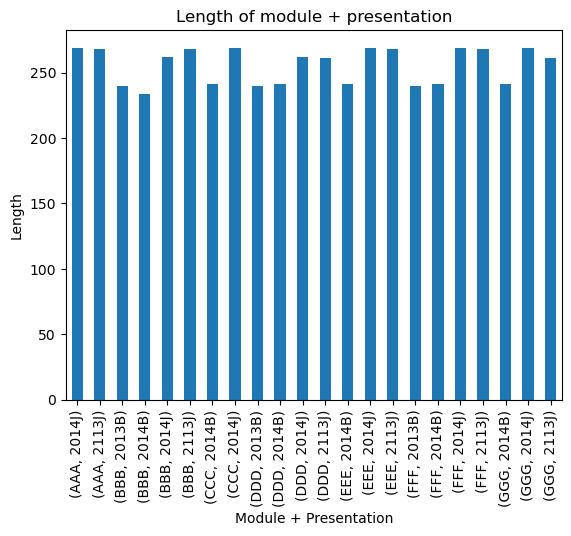

In [13]:
courses.groupby(['code_module', 'code_presentation'])['module_presentation_length'].sum().plot(kind='bar', xlabel='Module + Presentation', ylabel='Length', title='Length of module + presentation')

The module + presentation length seems to be all along the same line. There's no outliers here. The Courses dataframe is clean now!

#### StudentAssessment

The StudentAssessment dataframe will be used to link assessments to student information. This is important to know eg. gender, age, etc. of a student and compare it to their grades.

In [14]:
studentAssessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


Five columns. Is_banked is a boolean value, so the 0s we see there are not the same as null and should be left in. However, the column itself will be pruned as we won't actually use it, so its values don't actually matter for us.

##### Pruning columns

As we just stated, the is_banked column will be dropped. We're only interested in exams. Those are on fixed dates, so date_submitted is also of no concern to us.

In [15]:
del studentAssessment['is_banked']
del studentAssessment['date_submitted']
studentAssessment

,id_assessment,id_student,score
0,1752,11391,78.0
1,1752,28400,70.0
2,1752,31604,72.0
3,1752,32885,69.0
4,1752,38053,79.0
...,...,...,...
173907,37443,527538,60.0
173908,37443,534672,100.0
173909,37443,546286,80.0
173910,37443,546724,100.0


##### Missing values

Let's check for any actual null values.

In [16]:
studentAssessment.isnull().any()

id_assessment    False
id_student       False
score             True
dtype: bool

There are null values for score.

In [17]:
studentAssessment.isnull().groupby(['score']).count()

,id_assessment,id_student
score,,
False,173739,173739
True,173,173


There are 173 null scores, out of 173739 scores. That is a very small amount, roughly 0,01% of all assessments. Let's see if we can find out why this is.

First, let's check if it has to do with the type of assessment. We'll split this in two parts: Checking the type for the null scores, and for the scores that are not null.

Checking type for null scores:

In [18]:
nullScores = studentAssessment[studentAssessment['score'].isnull()]
nullAssessments = pd.merge(left= nullScores,right=assessment, how='inner')
nullAssessments.groupby('assessment_type').count()

,id_assessment,id_student,score,code_module,code_presentation
assessment_type,,,,,
TMA,173,173,0,173,173


Checking type for scores that are not null:

In [19]:
notNullScores = studentAssessment[studentAssessment['score'].notnull()]
notNullAssessments = pd.merge(left= notNullScores,right=assessment, how='inner')
notNullAssessments.groupby('assessment_type').count()

,id_assessment,id_student,score,code_module,code_presentation
assessment_type,,,,,
CMA,70527,70527,70527,70527,70527
Exam,4959,4959,4959,4959,4959
TMA,98253,98253,98253,98253,98253


We can clearly see that the small amount of assessments not scored, are of type TMA. These are Teacher Marked Assessments. No other type has null scores. As teachers are humans, and humans can make errors, these missing scores can be attributed to human error. The teachers had alot of scores to fill out and over time, one teacher here and another teacher there missed entering one score here or there.

Luckily for us, we're only interested in exams, though, not TMA or CMA (Computer Marked Assessment). Later on, we'll filter out the assessments of type Exam anyways, so no need to do anything about the null values in score here.

##### Outliers

For StudentAssessment, the only column that has the potential to have outliers, it's score. However, as long as it's between 0 and 100, this data is fine. We'll have to check if there's any score outside that range.

In [20]:
studentAssessment.loc[(studentAssessment['score'] < 0) | (studentAssessment['score'] > 100)]['id_assessment'].count()

0

There are zero assessments outside the 0 - 100 range. The StudentAssessment dataframe is ready for usage.

#### StudentInfo

The studentInfo dataframe has all the personal information of a student. Aside from the primary and foreign keys, the fields that are of most interest to us, are gender, age_band and final_result.

In [21]:
studentInfo

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,NaN,NaN,28400,NaN,Scotland,NaN,20-30%,NaN,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


##### Pruning columns

Let's first drop the fields we're not interested in, as it's a whole lot of clutter.

In [22]:
del studentInfo['region']
del studentInfo['highest_education']
del studentInfo['imd_band']
del studentInfo['num_of_prev_attempts']
del studentInfo['studied_credits']
del studentInfo['disability']
studentInfo

,code_module,code_presentation,id_student,gender,age_band,final_result
0,AAA,2013J,11391,M,55<=,Pass
1,NaN,NaN,28400,NaN,NaN,Pass
2,AAA,2013J,30268,F,35-55,Withdrawn
3,AAA,2013J,31604,F,35-55,Pass
4,AAA,2013J,32885,F,0-35,Pass
...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,0-35,Fail
32589,GGG,2014J,2645731,F,35-55,Distinction
32590,GGG,2014J,2648187,F,0-35,Pass
32591,GGG,2014J,2679821,F,35-55,Withdrawn


As always, we'll need to find the null values, first:

In [23]:
studentInfo.isnull().any()

code_module           True
code_presentation     True
id_student           False
gender                True
age_band              True
final_result         False
dtype: bool

Code_module and code_presentation have null values. We can drop these rows, as we're interested in exams scores. If there's no module or presentation linked to the data, there is also no exam linked to it, thus no exam score.

In [24]:
studentInfo = studentInfo[studentInfo['code_module'].notnull()]
studentInfo = studentInfo[studentInfo['code_presentation'].notnull()]

Let's see if that cleared out other null values along the way:

In [25]:
studentInfo.isnull().any()

code_module          False
code_presentation    False
id_student           False
gender               False
age_band             False
final_result         False
dtype: bool

We now have no more missing values.

##### Outliers

With the StudentInfo, there's alot of potential for outliers. We'll check the following categorical data:
* Gender
* Age band
* Final result

**Gender**

Gender can have one of two values: M or F. Let's see if there's any value other than that:

In [26]:
studentInfo.groupby(['gender'])['id_student'].count()

gender
F    13311
M    15836
Name: id_student, dtype: int64

There's only M and F as values for gender, so no outliers there.

**Age band**

Age band may contain any of the following values:
* 0-35
* 35-55
* 55<=

Let's check the different values in this column.

In [27]:
studentInfo.groupby(['age_band'])['id_student'].count()

age_band
0-35     20665
35-55     8298
55<=       184
Name: id_student, dtype: int64

All values in the age band column are allowed. This column is clean as well.

**Final result**

The final result values are allowed to be one of the following:
* Distinction
* Pass
* Fail
* Withdrawn

Students who have withdrawn, are of no interest to us, as there is no score there. We'll filter those out first along with any value that's not allowed in here.

In [28]:
studentInfo.groupby(['final_result'])['code_module', 'code_presentation'].count()

C:\Users\robbe\AppData\Local\Temp\ipykernel_31244\3346294589.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  studentInfo.groupby(['final_result'])['code_module', 'code_presentation'].count()


,code_module,code_presentation
final_result,,
Distinction,2696,2696
Fail,6200,6200
Pass,11002,11002
Withdrawn,9249,9249


There are no values not allowed in here, so we'll just take the Withdrawn records out and we're good to go!

In [29]:
studentInfo = studentInfo.loc[studentInfo['final_result'] != 'Withdrawn']
studentInfo.groupby(['final_result'])['code_module', 'code_presentation'].count()

C:\Users\robbe\AppData\Local\Temp\ipykernel_31244\2150289566.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  studentInfo.groupby(['final_result'])['code_module', 'code_presentation'].count()


,code_module,code_presentation
final_result,,
Distinction,2696,2696
Fail,6200,6200
Pass,11002,11002


#### StudentVLE

The StudentVLE dataframe contains a list of keys linking modules + presentations together with students and course material available in the VLE (Virtual Learning Environment), along with how many times a student clicked on each piece of material.

In [30]:
studentVle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


##### Pruning columns

We'll need all columns, except date. We care about how often a student has interacted with a piece of module material, not when. As such, we can drop the date column.

In [31]:
del studentVle['date']
studentVle

,code_module,code_presentation,id_student,id_site,sum_click
0,AAA,2013J,28400,546652,4
1,AAA,2013J,28400,546652,1
2,AAA,2013J,28400,546652,1
3,AAA,2013J,28400,546614,11
4,AAA,2013J,28400,546714,1
...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,3
10655276,GGG,2014J,675578,896943,1
10655277,GGG,2014J,654064,896943,3
10655278,GGG,2014J,654064,896939,1


Let's check the data for missing values

In [32]:
studentVle.isnull().any()

code_module          False
code_presentation    False
id_student           False
id_site              False
sum_click            False
dtype: bool

Lucky us, no missing values!

##### Outliers

The only column that may have outliers, is the sum_click column. A student may have clicked some study material zero times, or a million. In other words, only negative values would be odd.

In [33]:
studentVle.loc[studentVle['sum_click'] < 0]['id_site'].count()

0

There's not a single item with a negative amount of clicks, so StudentVLE is clean!

#### VLE

The VLE dataframe has all the info on study material for each module / presentation.

In [34]:
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


##### Pruning columns

We're not particularly interested in the timeframe a piece of material has been made available. We'll just use this data to figure out how much a student interacted with the course material, what type it is, and whether or not there's an influence on their grades.

Both week_from and week_to have plenty of null values. As said before, we're not actually interested in this information, so we'll just drop these columns altogether.

In [35]:
del vle['week_from']
del vle['week_to']
vle

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546998,AAA,2013J,resource
3,546888,AAA,2013J,url
4,547035,AAA,2013J,resource
...,...,...,...,...
6359,897063,GGG,2014J,resource
6360,897109,GGG,2014J,resource
6361,896965,GGG,2014J,oucontent
6362,897060,GGG,2014J,resource


##### Missing values

Now let's see if there are still any missing values.

In [36]:
vle.isnull().any()

id_site              False
code_module          False
code_presentation    False
activity_type        False
dtype: bool

No missing values.

##### Outliers

The data in the VLE dataset is mostly primary and foreign keys. The only column that may have outliers, is activity type. For this, we would have to ask ourselves how a value here could be an outlier. There's no fixed set of types possible. It's not a numerical value within a certain range. The only possible way an outlier value may be an issue, is if it's the same as another, but with a typo. Let's check for that.

<AxesSubplot:xlabel='activity_type'>

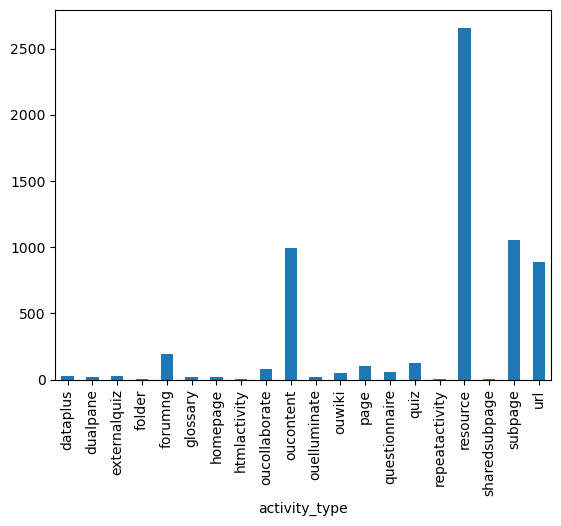

In [37]:
vle.groupby(['activity_type'])['id_site'].count().plot(kind='bar')

Although one could debate there may be overlap in one or more of homepage, htmlactivity, subpage, sharedsubpage and URL, there is no real definition of each. There's no name that's so close to another that it could be considered a typo.

The amount of items per type are all over the place. The types themselves are also all over the place. There are some very specific types (eg. folder, externalquiz, ...) but also some very general ones (eg. oucontent, resource, ...). There's also simply too many categories, especially ones with barely any items.

Maybe we can group these into rough categories:
* HTML (Homepage, HTMLActivity, Page, Sharedsubpage, subpage, URL)
* OU (OUCollaborate, OUContent, OUElluminate, OUWiki)
* Misc (Dataplus, Dualpane, Externalquiz, Folder, Forumng, Glossary, Questionnaire, Quiz, Repeatactivity, Resource)

Let's see what the numbers give on that:

<AxesSubplot:xlabel='activity_type'>

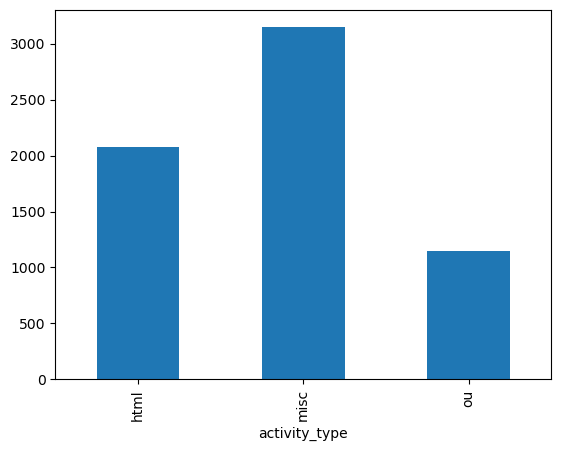

In [38]:
# HTML group
vle['activity_type'].mask(
    (vle['activity_type'] == 'homepage') | 
    (vle['activity_type'] == 'htmlactivity') | 
    (vle['activity_type'] == 'page') | 
    (vle['activity_type'] == 'sharedsubpage') | 
    (vle['activity_type'] == 'subpage') | 
    (vle['activity_type'] == 'url'), 'html', inplace=True)

# OU group
vle['activity_type'].mask(
    (vle['activity_type'] == 'oucollaborate') | 
    (vle['activity_type'] == 'oucontent') | 
    (vle['activity_type'] == 'ouelluminate') | 
    (vle['activity_type'] == 'ouwiki'), 'ou', inplace=True)

vle['activity_type'].mask(
    (vle['activity_type'] == 'dataplus') | 
    (vle['activity_type'] == 'dualpane') | 
    (vle['activity_type'] == 'externalquiz') | 
    (vle['activity_type'] == 'folder') | 
    (vle['activity_type'] == 'forumng') |
    (vle['activity_type'] == 'glossary') | 
    (vle['activity_type'] == 'questionnaire') |
    (vle['activity_type'] == 'quiz') |
    (vle['activity_type'] == 'repeatactivity') |
    (vle['activity_type'] == 'resource'), 'misc', inplace=True)


vle.groupby(['activity_type'])['id_site'].count().plot(kind='bar')

That looks far more usable. With that, the VLE dataframe is cleaned up.

### Derived data sets

Some data isn't in the raw data, but can be found using it. Consider it as finding someone's age if you have the year they were born. Here, we will make a few data sets in such a manner, which will be used throughout the rest of our research.

We will need the following derived data sets:
* Student scores for final exams
* Students final score, split by gender
* Students final score, split by age
* Sets students per final score
* Total amount of clicks each student did on a module's study material
* Total amount of clicks each student did per study material type

#### Student scores for final exams

We will first get all the assessments that are of type 'Exam'. We'll need this in order to filter the list of student scores to just the final exam scores.

In [39]:
exams = assessment.loc[assessment['assessment_type'] == 'Exam']
exams

,code_module,code_presentation,id_assessment,assessment_type
5,AAA,2013J,1757,Exam
11,AAA,2014J,1763,Exam
23,BBB,2013B,14990,Exam
35,BBB,2013J,15002,Exam
47,BBB,2014B,15014,Exam
53,BBB,2014J,15025,Exam
62,CCC,2014B,24290,Exam
63,CCC,2014B,40087,Exam
72,CCC,2014J,24299,Exam
73,CCC,2014J,40088,Exam


Now we join the newly created list of exams with the list of student scores. This way, we'll have a list of student scores for final exams, but no other assessments.

In [40]:
studentScoresPerExam = pd.merge(left = exams, right = studentAssessment, how ='inner')
studentScoresPerExam

,code_module,code_presentation,id_assessment,assessment_type,id_student,score
0,CCC,2014B,24290,Exam,558914,32.0
1,CCC,2014B,24290,Exam,559706,78.0
2,CCC,2014B,24290,Exam,559770,54.0
3,CCC,2014B,24290,Exam,560114,64.0
4,CCC,2014B,24290,Exam,560311,100.0
...,...,...,...,...,...,...
4954,DDD,2014J,25368,Exam,652680,91.0
4955,DDD,2014J,25368,Exam,652732,47.0
4956,DDD,2014J,25368,Exam,652965,87.0
4957,DDD,2014J,25368,Exam,653051,27.0


Even though it should not be the case, there is a possibility this list contains students who got a score for an exam without having enrolled into any module. To filter these faulty results out, we will join studentInfo with this. That way, the faulty results are filtered out.

In [41]:
studentsFinalExams = pd.merge(left= studentInfo,right=studentScoresPerExam, how='inner')
studentsFinalExams

,code_module,code_presentation,id_student,gender,age_band,final_result,id_assessment,assessment_type,score
0,CCC,2014B,29764,M,0-35,Distinction,24290,Exam,94.0
1,CCC,2014B,29820,M,0-35,Pass,24290,Exam,76.0
2,CCC,2014B,40604,M,35-55,Pass,24290,Exam,66.0
3,CCC,2014B,46605,M,35-55,Distinction,24290,Exam,98.0
4,CCC,2014B,49119,M,0-35,Distinction,24290,Exam,100.0
...,...,...,...,...,...,...,...,...,...
4356,DDD,2014J,2677210,M,0-35,Pass,25368,Exam,71.0
4357,DDD,2014J,2678380,M,35-55,Pass,25368,Exam,64.0
4358,DDD,2014J,2684043,M,0-35,Pass,25368,Exam,69.0
4359,DDD,2014J,2685863,F,35-55,Pass,25368,Exam,49.0


#### Students final score, split by gender

Because one of the major variables we will check, is gender, it pays off to create a set with how many students there are, per gender

<AxesSubplot:xlabel='gender'>

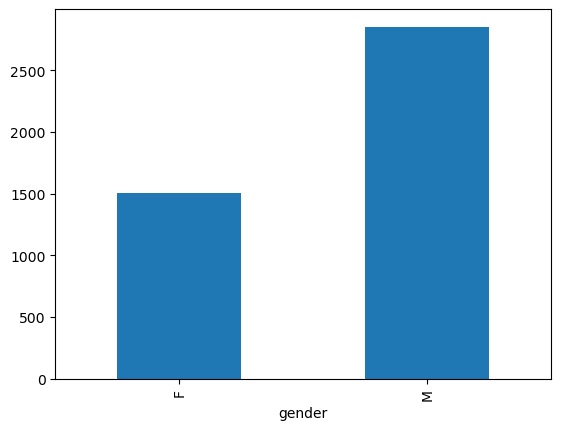

In [42]:
studentsFinalExamsByGender = studentsFinalExams.groupby(['gender'])['id_student'].count()
studentsFinalExamsByGender.plot(kind='bar')

#### Students final score, split by age

Because one of the major variables we will check, is age, it pays off to create a set with how many students there are, per age range

<AxesSubplot:xlabel='age_band'>

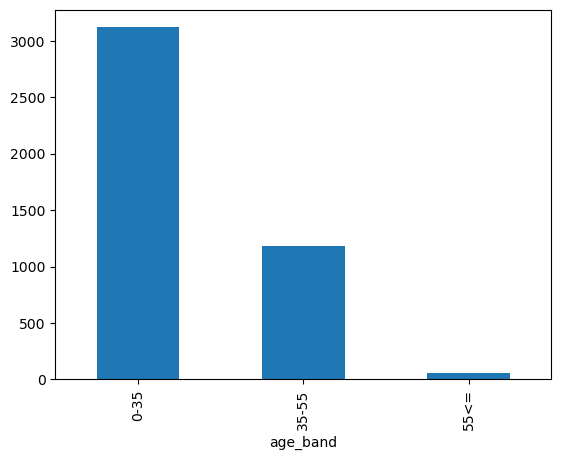

In [43]:
studentsFinalExamsByAge = studentsFinalExams.groupby(['age_band'])['id_student'].count()
studentsFinalExamsByAge.plot(kind='bar')

#### Sets students per final score

The different ranges we will work with, are defined in the final score column:
* Fail
* Pass
* Distinction

In [44]:
failed = studentsFinalExams.loc[studentsFinalExams['final_result'] == 'Fail']
passed = studentsFinalExams.loc[studentsFinalExams['final_result'] == 'Pass']
distinction = studentsFinalExams.loc[studentsFinalExams['final_result'] == 'Distinction']


Let's test these ranges: We'll see how many students there are in each range, and if it adds up to the total amount of students

In [45]:
failed['id_student'].count()

613

In [46]:
passed['id_student'].count()

2983

In [47]:
distinction['id_student'].count()

765

All added up:

In [48]:
totalRanges = failed['id_student'].count() + passed['id_student'].count() + distinction['id_student'].count()
totalStudents = studentsFinalExams['id_student'].count()
totalRanges == totalStudents

True

The total sum of the students in the ranges is the same as the total sum of students, so these are alright to use.

#### Total amount of clicks each student did on a module's study material

One of the main variables we will check on, is the effect of module material usage on grades. As such, it's a good idea to prepare a dataframe that contains all clicks per student for each module.

In [49]:
studentClicks = studentVle.groupby(['id_student','code_module', 'code_presentation'])['sum_click'].sum().reset_index(name ='sum_click')
studentClicks

,id_student,code_module,code_presentation,sum_click
0,6516,AAA,2014J,2791
1,8462,DDD,2013J,646
2,8462,DDD,2014J,10
3,11391,AAA,2013J,934
4,23629,BBB,2013B,161
...,...,...,...,...
29223,2698257,AAA,2013J,758
29224,2698535,CCC,2014B,786
29225,2698535,EEE,2013J,3455
29226,2698577,BBB,2014J,717


If we want to compare the amount of clicks for a course, we need something to compare it to. We will create an extra column with the mean of the sum of clicks. This way, we can compare the total amount of clicks of a student on a specific module's material, and see if it's more or less than the average amount of clicks.

To do this, we obviously need to know the mean first. Let's calculate this

In [50]:
studentClicksMean = studentClicks.groupby(['code_module'])['sum_click'].mean().reset_index()
studentClicksMean.rename(columns={'sum_click':'mean_sum_click'}, inplace = True)
studentClicksMean

,code_module,mean_sum_click
0,AAA,1696.125170
1,BBB,790.422229
2,CCC,1175.533266
3,DDD,962.591645
4,EEE,1483.883426
5,FFF,2480.812465
6,GGG,563.771767


Now that we have the mean per module, we still need to add it to the dataframe of total clicks per student per module. We will join these two dataframes now.

In [51]:
studentClicks = pd.merge(left= studentClicks, right= studentClicksMean,how='inner')
studentClicks

,id_student,code_module,code_presentation,sum_click,mean_sum_click
0,6516,AAA,2014J,2791,1696.125170
1,11391,AAA,2013J,934,1696.125170
2,24734,AAA,2014J,499,1696.125170
3,26192,AAA,2014J,2223,1696.125170
4,28061,AAA,2014J,1590,1696.125170
...,...,...,...,...,...
29223,2697630,FFF,2014B,1109,2480.812465
29224,2697885,FFF,2014B,1986,2480.812465
29225,2697921,FFF,2013J,2319,2480.812465
29226,2697921,FFF,2014J,1767,2480.812465


#### Total amount of clicks each student did per study material type per module / presentation

It may also be interesting to know what type of material is the most helpful for a student. For this, we'll make a new dataframe similar to the previous one, but for each type of study material

First, we'll need to merge the studentVLE dataframe with the VLE one, so we have clicks and types together.

In [52]:
studentVleTypes = pd.merge(left = studentVle, right = vle, how='inner')
studentVleTypes

,code_module,code_presentation,id_student,id_site,sum_click,activity_type
0,AAA,2013J,28400,546652,4,misc
1,AAA,2013J,28400,546652,1,misc
2,AAA,2013J,28400,546652,1,misc
3,AAA,2013J,28400,546652,8,misc
4,AAA,2013J,30268,546652,3,misc
...,...,...,...,...,...,...
10655275,GGG,2014J,647054,896969,8,ou
10655276,GGG,2014J,499187,896969,8,ou
10655277,GGG,2014J,629258,896969,23,ou
10655278,GGG,2014J,534672,896969,1,ou


Now we need to group them together by type and get the sum of the clicks.

In [53]:
studentVleTypes = studentVleTypes.groupby(['id_student', 'code_module', 'code_presentation', 'activity_type'])['sum_click'].sum().reset_index(name ='sum_click')
studentVleTypes.rename(columns={'sum_click':'type_sum_click'}, inplace = True)
studentVleTypes

,id_student,code_module,code_presentation,activity_type,type_sum_click
0,6516,AAA,2014J,html,783
1,6516,AAA,2014J,misc,503
2,6516,AAA,2014J,ou,1505
3,8462,DDD,2013J,html,434
4,8462,DDD,2013J,misc,118
...,...,...,...,...,...
84937,2698577,BBB,2014J,misc,213
84938,2698577,BBB,2014J,ou,258
84939,2698588,BBB,2014J,html,249
84940,2698588,BBB,2014J,misc,116


As before, we will need something to compare the sum of the clicks to. We'll get the average amount of clicks again, to compare against.

In [54]:
studentVleTypesMean = studentVleTypes.groupby(['activity_type', 'code_module', 'code_presentation'])['type_sum_click'].mean().reset_index()
studentVleTypesMean.rename(columns={'type_sum_click':'type_mean_sum_click'}, inplace = True)
studentVleTypesMean

,activity_type,code_module,code_presentation,type_mean_sum_click
0,html,AAA,2013J,517.785714
1,html,AAA,2014J,478.868347
2,html,BBB,2013B,255.034505
3,html,BBB,2013J,248.711230
4,html,BBB,2014B,214.600464
...,...,...,...,...
61,ou,FFF,2014B,865.497768
62,ou,FFF,2014J,1010.422384
63,ou,GGG,2013J,207.020833
64,ou,GGG,2014B,191.224161


Now that we have the mean per type, we still need to add it to the dataframe of clicks per student per type. We will join these two dataframes now.

In [55]:
studentVleTypes = pd.merge(left = studentVleTypes, right = studentVleTypesMean, on=['activity_type', 'code_module', 'code_presentation'], how='inner')
studentVleTypes

,id_student,code_module,code_presentation,activity_type,type_sum_click,type_mean_sum_click
0,6516,AAA,2014J,html,783,478.868347
1,24734,AAA,2014J,html,174,478.868347
2,26192,AAA,2014J,html,937,478.868347
3,28061,AAA,2014J,html,675,478.868347
4,31600,AAA,2014J,html,96,478.868347
...,...,...,...,...,...,...
84937,2659042,BBB,2014B,ou,36,25.789282
84938,2677541,BBB,2014B,ou,38,25.789282
84939,2681783,BBB,2014B,ou,11,25.789282
84940,2683697,BBB,2014B,ou,1,25.789282


## What role does gender play on the grades?


We will now see if there are any differences between the genders within each score range.

### Failed

#### Absolute numbers

<AxesSubplot:xlabel='gender'>

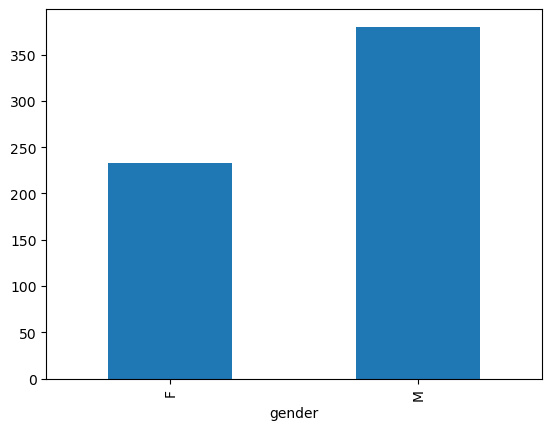

In [56]:
failedByGender = failed.groupby(['gender'])['id_student'].count()
failedByGender.plot(kind='bar')

In absolute numbers, less female students failed than male students: 233 female students vs 380 male students.

#### Percentage

In [57]:
failedByGender['M'] / studentsFinalExamsByGender['M'] * 100

13.314646110721796

In [58]:
failedByGender['F'] / studentsFinalExamsByGender['F'] * 100

15.461181154611811

Procentually speaking, 13% of the male students failed, while 15% of the female students failed. While that's more female students than male, the difference is too small to state gender plays a role in failing an exam.

### Passed

#### Absolute numbers

<AxesSubplot:xlabel='gender'>

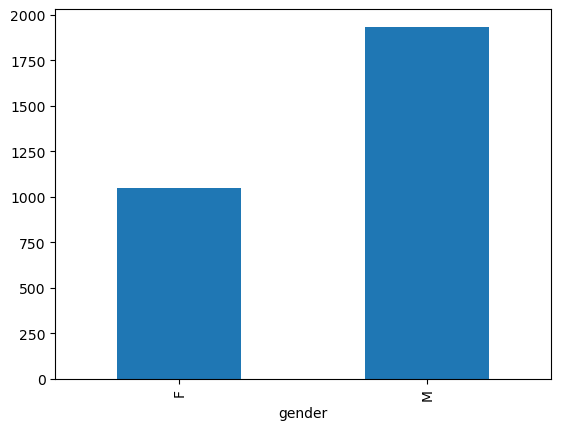

In [59]:
passedByGender = passed.groupby(['gender'])['id_student'].count()
passedByGender.plot(kind='bar')

In absolute numbers, less female students passed than male students: 1049 female students vs 1934 male students.

#### Percentage

In [60]:
passedByGender['M'] / studentsFinalExamsByGender['M'] * 100

67.7645409950946

In [61]:
passedByGender['F'] / studentsFinalExamsByGender['F'] * 100

69.60849369608493

Procentually speaking, 68% of the male students passed, compared to 70% of the female students. Again, there seems to be no difference in gender when it comes to just passing a final exam.

### Distinction

#### Absolute numbers

<AxesSubplot:xlabel='gender'>

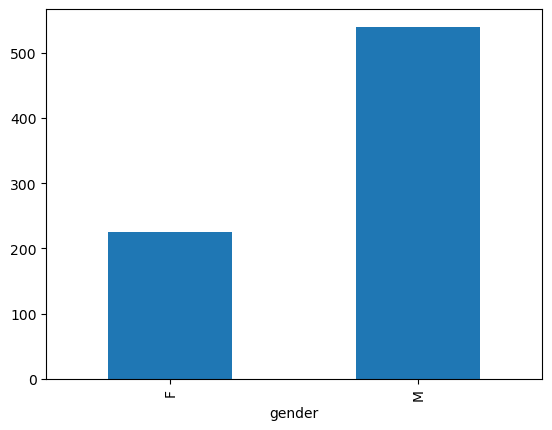

In [62]:
distinctionByGender = distinction.groupby(['gender'])['id_student'].count()
distinctionByGender.plot(kind='bar')

In absolute numbers, less female students barely passed than male students: 225 female students vs 540 male students.

#### Percentage

In [63]:
distinctionByGender['M'] / studentsFinalExamsByGender['M'] * 100

18.9208128941836

In [64]:
distinctionByGender['F'] / studentsFinalExamsByGender['F'] * 100

14.93032514930325

Procentually speaking, 19% of the male students passed with exceptional grades, compared to 15% of the female students. Again, there seems to be no difference in gender when it comes to just passing a final exam.

### Conclusion

There is no significant difference between the genders in any score range. We can safely conclude that gender has no influence on the final exam scores.

## How does usage of module material affect the grades of a student?

Maybe how much a student interacted with the provided course material has an influence on their grade.

We will check the amount of interactions per module, per student in each range

There are alot of columns, most of which are not relevant for this specific check. We will limit the dataframes to show only the relevant columns.

### Failed

#### Total amount of clicks

Let's first check the amount of clicks per failed student

In [65]:
clicksFailed = pd.merge(left=studentClicks, right=failed, on=['code_module', 'code_presentation', 'id_student'], how='inner')
clicksFailed = clicksFailed[['id_student', 'code_module', 'code_presentation', 'sum_click', 'mean_sum_click']].copy()
clicksFailed

,id_student,code_module,code_presentation,sum_click,mean_sum_click
0,28046,DDD,2013J,661,962.591645
1,31173,DDD,2013J,858,962.591645
2,52014,DDD,2013B,349,962.591645
3,63015,DDD,2014J,694,962.591645
4,63566,DDD,2013J,1232,962.591645
...,...,...,...,...,...
607,2405934,CCC,2014J,3013,1175.533266
608,2458925,CCC,2014J,4433,1175.533266
609,2499779,CCC,2014J,1156,1175.533266
610,2552412,CCC,2014J,3768,1175.533266


We now have a list of failed students and the amount of interactions they had with the failed module's material, as well as an average of interactions for that module. We would like to know how many of these students interacted more than the average, and how many interacted less than the average.

#### Average or up amount of clicks

First, let's see how many students had an amount of interactions equal to or above the average.

In [66]:
clicksMoreFailed = clicksFailed.where((clicksFailed['sum_click'] >= clicksFailed['mean_sum_click']))
clicksMoreFailed = clicksMoreFailed.dropna(how='all')
clicksMoreFailed['id_student'].count()

258

What percentage of the failed students is this?

In [67]:
clicksMoreFailed['id_student'].count() / clicksFailed['id_student'].count() * 100

42.15686274509804

#### Below average amount of clicks

Now let's see how many students had a below average amount of interactions

In [68]:
clicksLessFailed = clicksFailed.where((clicksFailed['sum_click'] < clicksFailed['mean_sum_click']))
clicksLessFailed = clicksLessFailed.dropna(how='all')
clicksLessFailed['id_student'].count()

354

What percentage of the failed students is this?

In [69]:
clicksLessFailed['id_student'].count() / clicksFailed['id_student'].count() * 100

57.84313725490197

#### Conclusion

42% of the failed students interacted the average amount or more with the module material, compared to 58% of the failed students who interacted less.

### Passed

#### Total amount of clicks

Let's first check the amount of clicks per student who passed.

In [70]:
clicksPassed = pd.merge(left=studentClicks, right=passed, how='inner')
clicksPassed = clicksPassed[['id_student', 'code_module', 'code_presentation', 'sum_click', 'mean_sum_click']].copy()
clicksPassed

,id_student,code_module,code_presentation,sum_click,mean_sum_click
0,24213,DDD,2014B,1992,962.591645
1,29411,DDD,2013J,841,962.591645
2,33796,DDD,2014J,351,962.591645
3,33930,DDD,2013J,544,962.591645
4,40419,DDD,2013J,560,962.591645
...,...,...,...,...,...
2978,2622441,CCC,2014J,1017,1175.533266
2979,2639310,CCC,2014B,1923,1175.533266
2980,2641486,CCC,2014B,440,1175.533266
2981,2658314,CCC,2014J,2910,1175.533266


We now have a list of students who passed, and the amount of interactions they had with the module's material, as well as an average of interactions for that module. We would like to know how many of these students interacted more than the average, and how many interacted less than the average.

#### Average or up amount of clicks

First, let's see how many students had an amount of interactions equal to or above the average.

In [71]:
clicksMorePassed = clicksPassed.where((clicksPassed['sum_click'] >= clicksPassed['mean_sum_click']))
clicksMorePassed = clicksMorePassed.dropna(how='all')
clicksMorePassed['id_student'].count()

1770

What percentage of the students who passed is this?

In [72]:
clicksMorePassed['id_student'].count() / clicksPassed['id_student'].count() * 100

59.33623868588669

#### Below average amount of clicks

Now let's see how many students had a below average amount of interactions

In [73]:
clicksLessPassed = clicksPassed.where((clicksPassed['sum_click'] < clicksPassed['mean_sum_click']))
clicksLessPassed = clicksLessPassed.dropna(how='all')
clicksLessPassed['id_student'].count()

1213

What percentage of the students who passed is this?

In [74]:
clicksLessPassed['id_student'].count() / clicksPassed['id_student'].count() * 100

40.66376131411331

#### Conclusion

59% of the students who passed interacted the average amount or more with the module material, compared to 41% of the students who passed who interacted less.

### Distinction

#### Total amount of clicks

Let's first check the amount of clicks per student who passed with distinction

In [75]:
clicksDistinction = pd.merge(left=studentClicks, right=distinction, how='inner')
clicksDistinction = clicksDistinction[['id_student', 'code_module', 'code_presentation', 'sum_click', 'mean_sum_click']].copy()
clicksDistinction

,id_student,code_module,code_presentation,sum_click,mean_sum_click
0,40184,DDD,2013J,1876,962.591645
1,50476,DDD,2014B,568,962.591645
2,67781,DDD,2014B,1771,962.591645
3,84576,DDD,2014B,2126,962.591645
4,103904,DDD,2013B,1579,962.591645
...,...,...,...,...,...
760,2631703,CCC,2014B,731,1175.533266
761,2647893,CCC,2014J,1067,1175.533266
762,2665399,CCC,2014B,2298,1175.533266
763,2668106,CCC,2014J,1714,1175.533266


We now have a list of students who passed with distinction, and the amount of interactions they had with the module's material, as well as an average of interactions for that module. We would like to know how many of these students interacted more than the average, and how many interacted less than the average.

#### Average or up amount of clicks

First, let's see how many students had an amount of interactions equal to or above the average.

In [76]:
clicksMoreDistinction = clicksDistinction.where((clicksDistinction['sum_click'] >= clicksDistinction['mean_sum_click']))
clicksMoreDistinction = clicksMoreDistinction.dropna(how='all')
clicksMoreDistinction['id_student'].count()

590

What percentage of the students who passed with distinction is this?

In [77]:
clicksMoreDistinction['id_student'].count() / clicksDistinction['id_student'].count() * 100

77.12418300653596

#### Below average amount of clicks

Now let's see how many students had a below average amount of interactions

In [78]:
clicksLessDistinction = clicksDistinction.where((clicksDistinction['sum_click'] < clicksDistinction['mean_sum_click']))
clicksLessDistinction = clicksLessDistinction.dropna(how='all')
clicksLessDistinction['id_student'].count()

175

What percentage of the students who passed with distinction is this?

In [79]:
clicksLessDistinction['id_student'].count() / clicksDistinction['id_student'].count() * 100

22.875816993464053

#### Conclusion

77% of the students who passed with distinction interacted the average amount or more with the module material, compared to 23% of the students who passed with distinction who interacted less. The difference is overwhelming here.

### Conclusion

It seems the better the score, the more a student has interacted with the module material. This gets more and more visible as the score goes up. As such, there seems a clear corelation between module material interaction and the score. The more a student interacts with the provided material, the more likely they are to get a high score.

## Does the age play a role on the grades?

Another big difference between students, aside from gender and amount of interactions with course material, is their age. Let's see if there's a corelation between age and grade.

### Failed

As usual, we start with the students who failed. What age are they in?

We have all of this data in a dataframe already. All we need to do, is group and count.

<AxesSubplot:xlabel='age_band'>

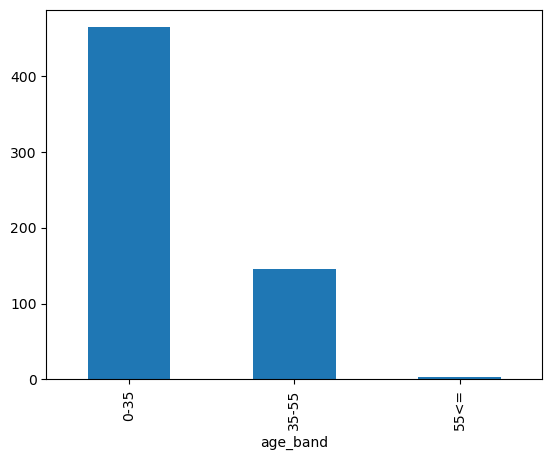

In [80]:
failedByAge = failed.groupby(['age_band'])['id_student'].count()
failedByAge.plot(kind='bar')

In absolute numbers, the students under 35 fail the most. That is not surprising, considering most students are under 35 anyways. As usual, the percentage will tell us more.

In [81]:
failedByAge['0-35'] / studentsFinalExamsByAge['0-35'] * 100

14.871794871794872

In [82]:
failedByAge['35-55'] / studentsFinalExamsByAge['35-55'] * 100

12.351945854483926

In [83]:
failedByAge['55<='] / studentsFinalExamsByAge['55<='] * 100

5.084745762711865

15% of the students under 35 failed their modules. 12% of the students between 35 and 55 did, and 5% of the students above 55 failed. One would say the older one is, the more likely they are to not fail a module. However, the population of students above 55 is so small, it may equal out closer to the other two if there were more students in this age range. Let's see what the other score ranges say before we make any conclusions.

### Passed

Now for the students who comfortably passed. Let's see if the age range there is similar as with the fails and barely passed students.

As before, we first group by age.

<AxesSubplot:xlabel='age_band'>

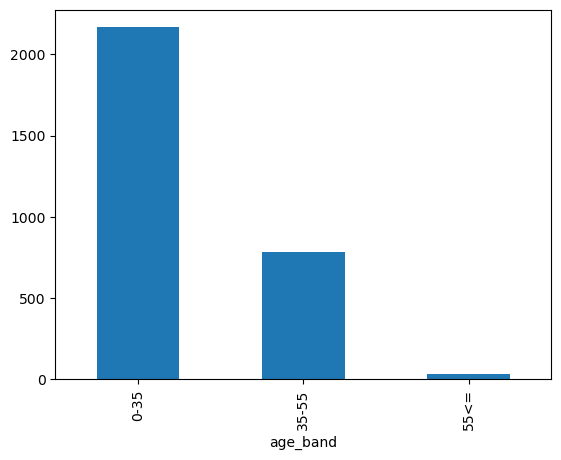

In [84]:
passedByAge = passed.groupby(['age_band'])['id_student'].count()
passedByAge.plot(kind='bar')

Again, it's the procentual values that tell us more, so we'll calculate them once again.

In [85]:
passedByAge['0-35'] / studentsFinalExamsByAge['0-35'] * 100

69.42307692307692

In [86]:
passedByAge['35-55'] / studentsFinalExamsByAge['35-55'] * 100

66.32825719120136

In [87]:
passedByAge['55<='] / studentsFinalExamsByAge['55<='] * 100

55.932203389830505

69% of the young students passed. 66% of the students between 35 and 55 did as well, and with 56% of the students older than 55 did, they catch up noticably. Here, we see a big difference.

### Distinction

One more time, we divide by age group.

<AxesSubplot:xlabel='age_band'>

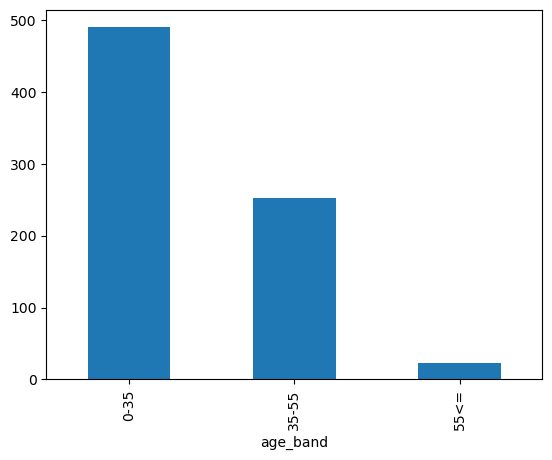

In [88]:
distinctionByAge = distinction.groupby(['age_band'])['id_student'].count()
distinctionByAge.plot(kind='bar')

The percentages will tell us more again.

In [89]:
distinctionByAge['0-35'] / studentsFinalExamsByAge['0-35'] * 100

15.705128205128204

In [90]:
distinctionByAge['35-55'] / studentsFinalExamsByAge['35-55'] * 100

21.31979695431472

In [91]:
distinctionByAge['55<='] / studentsFinalExamsByAge['55<='] * 100

38.983050847457626

16% of the students younger than 35 pass with distinction. 21% of the students between 35 and 55 do so, and a whopping 39% of students older than 55 pass with glowing grades. Let's put all these findings together and see if any conclusions can be made.

### Conclusion

* Age 0 - 35
    * Failed: 15%
    * Passed: 69%
    * Distinction: 16%
* Age 35 - 55
    * Failed: 12%
    * Passed: 66%
    * Distinction: 21%
* Age 55<=
    * Failed: 5%
    * Passed: 56%
    * Distinction: 39%

If we look at the percentages per age group, it would seem age has an influence on a student's grades. The older a student is, the higher their grades. We do need to be careful with this conclusion, considering the small amount of students in the highest age bracket compared to the lowest age bracket.

## Does module material type play a role on the grades?

### Failed

#### Total amount of clicks

Let's first check the amount of clicks per failed student

In [92]:
clicksTypesFailed = pd.merge(left=studentVleTypes, right=failed, how='inner')
clicksTypesFailed = clicksTypesFailed[['id_student', 'code_module', 'code_presentation', 'activity_type', 'type_sum_click', 'type_mean_sum_click']].copy()
clicksTypesFailed = clicksTypesFailed.groupby(['activity_type', 'id_student', 'code_module', 'code_presentation', 'type_sum_click', 'type_mean_sum_click']).count().reset_index()
clicksTypesFailed

,activity_type,id_student,code_module,code_presentation,type_sum_click,type_mean_sum_click
0,html,28046,DDD,2013J,352,470.548953
1,html,31173,DDD,2013J,301,470.548953
2,html,52014,DDD,2013B,136,578.055281
3,html,63015,DDD,2014J,360,362.210814
4,html,63566,DDD,2013J,767,470.548953
...,...,...,...,...,...,...
1811,ou,2615956,DDD,2014J,189,130.428302
1812,ou,2646737,DDD,2014J,107,130.428302
1813,ou,2655683,DDD,2013B,258,226.741026
1814,ou,2691861,CCC,2014J,2,160.037898


We now have a list of failed students and the amount of interactions they had with the failed module's material type per module and presentation, as well as an average of interactions for that type. This will be used for filtering out the more and less interactions.

Since we want to know percentages, we'll  also need the total amount of students who failed, grouped by the type of material

In [93]:
clicksTypesFailedCount = clicksTypesFailed.groupby(['activity_type'])['id_student'].count()
clicksTypesFailedCount

activity_type
html    612
misc    612
ou      592
Name: id_student, dtype: int64

The 612 for HTML and 612 for MISC seem slightly suspicious. Let's compare this to the total number of students who failed, to see if this is correct:

In [94]:
clicksTypesFailedCount['html'] + clicksTypesFailedCount['misc'] + clicksTypesFailedCount['ou'] == clicksTypesFailed['id_student'].count()

True

This is the same amount of students, so nothing suspicious going on here.

We would like to know how many of these students interacted more than the average, and how many interacted less than the average.

#### Average or up amount of clicks

First, let's see how many students had an amount of interactions equal to or above the average.

In [95]:
clicksTypesMoreFailed = clicksTypesFailed.where((clicksTypesFailed['type_sum_click'] >= clicksTypesFailed['type_mean_sum_click']))
clicksTypesMoreFailed = clicksTypesMoreFailed.dropna(how='all')
clicksTypesMoreFailed = clicksTypesMoreFailed.groupby(['activity_type'])['id_student'].count()
clicksTypesMoreFailed

activity_type
html    275
misc    206
ou      314
Name: id_student, dtype: int64

What percentage of the failed students is this?

In [96]:
clicksTypesMoreFailed['html'] / clicksTypesFailedCount['html'] * 100

44.93464052287582

In [97]:
clicksTypesMoreFailed['misc'] / clicksTypesFailedCount['misc'] * 100

33.66013071895425

In [98]:
clicksTypesMoreFailed['ou'] / clicksTypesFailedCount['ou'] * 100

53.04054054054054

#### Below average amount of clicks

Now let's see how many students had a below average amount of interactions

In [99]:
clicksTypesLessFailed = clicksTypesFailed.where((clicksTypesFailed['type_sum_click'] < clicksTypesFailed['type_mean_sum_click']))
clicksTypesLessFailed = clicksTypesLessFailed.dropna(how='all')
clicksTypesLessFailed = clicksTypesLessFailed.groupby(['activity_type'])['id_student'].count()
clicksTypesLessFailed

activity_type
html    337
misc    406
ou      278
Name: id_student, dtype: int64

What percentage of the failed students is this?

In [100]:
clicksTypesLessFailed['html'] / clicksTypesFailedCount['html'] * 100

55.06535947712419

In [101]:
clicksTypesLessFailed['misc'] / clicksTypesFailedCount['misc'] * 100

66.33986928104575

In [102]:
clicksTypesLessFailed['ou'] / clicksTypesFailedCount['ou'] * 100

46.95945945945946

#### Conclusion

* HTML
	* More: 45%
	* Less: 55%	
* MISC
	* More: 34%
	* Less: 66%
* OU
	* More: 53%
	* Less: 47%

For both HTML and OU, the percentages of students who failed and interacted more than average is in the same ballpark as the percentages of students who failed and interacted less than average.

For MISC, there's a significant amount of students who interacted less with this material.

### Passed

#### Total amount of clicks

In [103]:
clicksTypesPassed = pd.merge(left=studentVleTypes, right=passed, how='inner')
clicksTypesPassed = clicksTypesPassed[['id_student', 'code_module', 'code_presentation', 'activity_type', 'type_sum_click', 'type_mean_sum_click']].copy()
clicksTypesPassed = clicksTypesPassed.groupby(['activity_type', 'id_student', 'code_module', 'code_presentation', 'type_sum_click', 'type_mean_sum_click']).count().reset_index()
clicksTypesPassed

,activity_type,id_student,code_module,code_presentation,type_sum_click,type_mean_sum_click
0,html,23698,CCC,2014J,225,282.634072
1,html,24213,DDD,2014B,778,403.611659
2,html,28787,CCC,2014J,233,282.634072
3,html,29411,DDD,2013J,428,470.548953
4,html,29420,CCC,2014J,269,282.634072
...,...,...,...,...,...,...
8890,ou,2692186,DDD,2013J,196,204.606586
8891,ou,2692948,DDD,2014B,205,185.096981
8892,ou,2694886,DDD,2014B,100,185.096981
8893,ou,2694933,DDD,2013B,153,226.741026


The total numbers, per type

In [104]:
clicksTypesPassedCount = clicksTypesPassed.groupby(['activity_type'])['id_student'].count()
clicksTypesPassedCount

activity_type
html    2983
misc    2981
ou      2931
Name: id_student, dtype: int64

Verification

In [105]:
clicksTypesPassedCount['html'] + clicksTypesPassedCount['misc'] + clicksTypesPassedCount['ou'] == clicksTypesPassed['id_student'].count()

True

#### Average or up amount of clicks

First, let's see how many students had an amount of interactions equal to or above the average.

In [106]:
clicksTypesMorePassed = clicksTypesPassed.where((clicksTypesPassed['type_sum_click'] >= clicksTypesPassed['type_mean_sum_click']))
clicksTypesMorePassed = clicksTypesMorePassed.dropna(how='all')
clicksTypesMorePassed = clicksTypesMorePassed.groupby(['activity_type'])['id_student'].count()
clicksTypesMorePassed

activity_type
html    1807
misc    1546
ou      1595
Name: id_student, dtype: int64

What percentage of the failed students is this?

In [107]:
clicksTypesMorePassed['html'] / clicksTypesPassedCount['html'] * 100

60.57660073751258

In [108]:
clicksTypesMorePassed['misc'] / clicksTypesPassedCount['misc'] * 100

51.861791345186184

In [109]:
clicksTypesMorePassed['ou'] / clicksTypesPassedCount['ou'] * 100

54.41828727396793

#### Below average amount of clicks

Now let's see how many students had a below average amount of interactions

In [110]:
clicksTypesLessPassed = clicksTypesPassed.where((clicksTypesPassed['type_sum_click'] < clicksTypesPassed['type_mean_sum_click']))
clicksTypesLessPassed = clicksTypesLessPassed.dropna(how='all')
clicksTypesLessPassed = clicksTypesLessPassed.groupby(['activity_type'])['id_student'].count()
clicksTypesLessPassed

activity_type
html    1176
misc    1435
ou      1336
Name: id_student, dtype: int64

What percentage of the students who passed is this?

In [111]:
clicksTypesLessPassed['html'] / clicksTypesPassedCount['html'] * 100

39.42339926248743

In [112]:
clicksTypesLessPassed['misc'] / clicksTypesPassedCount['misc'] * 100

48.138208654813816

In [113]:
clicksTypesLessPassed['ou'] / clicksTypesPassedCount['ou'] * 100

45.58171272603207

#### Conclusion

* HTML
	* More: 61%
	* Less: 39%	
* MISC
	* More: 52%
	* Less: 48%
* OU
	* More: 54%
	* Less: 46%

For students who passed, only interaction with material of type HTML seems to have some impact.

### Distinction

#### Total amount of clicks

In [114]:
clicksTypesDistinction = pd.merge(left=studentVleTypes, right=distinction, how='inner')
clicksTypesDistinction = clicksTypesDistinction[['id_student', 'code_module', 'code_presentation', 'activity_type', 'type_sum_click', 'type_mean_sum_click']].copy()
clicksTypesDistinction = clicksTypesDistinction.groupby(['activity_type', 'id_student', 'code_module', 'code_presentation', 'type_sum_click', 'type_mean_sum_click']).count().reset_index()
clicksTypesDistinction

,activity_type,id_student,code_module,code_presentation,type_sum_click,type_mean_sum_click
0,html,27116,CCC,2014J,567,282.634072
1,html,29764,CCC,2014B,531,285.972619
2,html,30096,CCC,2014J,192,282.634072
3,html,31161,CCC,2014J,1337,282.634072
4,html,37652,CCC,2014J,300,282.634072
...,...,...,...,...,...,...
2273,ou,2668106,CCC,2014J,4,160.037898
2274,ou,2672686,DDD,2013B,1108,226.741026
2275,ou,2692327,CCC,2014B,250,145.158587
2276,ou,2692577,DDD,2014B,245,185.096981


The total numbers, per type:

In [115]:
clicksTypesDistinctionCount = clicksTypesDistinction.groupby(['activity_type'])['id_student'].count()
clicksTypesDistinctionCount

activity_type
html    765
misc    765
ou      748
Name: id_student, dtype: int64

Verification:

In [116]:
clicksTypesDistinctionCount['html'] + clicksTypesDistinctionCount['misc'] + clicksTypesDistinctionCount['ou'] == clicksTypesDistinction['id_student'].count()

True

#### Average or up amount of clicks

First, let's see how many students had an amount of interactions equal to or above the average.

In [117]:
clicksTypesMoreDistinction = clicksTypesDistinction.where((clicksTypesDistinction['type_sum_click'] >= clicksTypesDistinction['type_mean_sum_click']))
clicksTypesMoreDistinction = clicksTypesMoreDistinction.dropna(how='all')
clicksTypesMoreDistinction = clicksTypesMoreDistinction.groupby(['activity_type'])['id_student'].count()
clicksTypesMoreDistinction

activity_type
html    608
misc    561
ou      352
Name: id_student, dtype: int64

What percentage of the failed students is this?

In [118]:
clicksTypesMoreDistinction['html'] / clicksTypesDistinctionCount['html'] * 100

79.47712418300654

In [119]:
clicksTypesMoreDistinction['misc'] / clicksTypesDistinctionCount['misc'] * 100

73.33333333333333

In [120]:
clicksTypesMoreDistinction['ou'] / clicksTypesDistinctionCount['ou'] * 100

47.05882352941176

#### Below average amount of clicks

Now let's see how many students had a below average amount of interactions

In [121]:
clicksTypesLessDistinction = clicksTypesDistinction.where((clicksTypesDistinction['type_sum_click'] < clicksTypesDistinction['type_mean_sum_click']))
clicksTypesLessDistinction = clicksTypesLessDistinction.dropna(how='all')
clicksTypesLessDistinction = clicksTypesLessDistinction.groupby(['activity_type'])['id_student'].count()
clicksTypesLessDistinction

activity_type
html    157
misc    204
ou      396
Name: id_student, dtype: int64

What percentage of the students who passed with distinction is this?

In [122]:
clicksTypesLessDistinction['html'] / clicksTypesDistinctionCount['html'] * 100

20.522875816993462

In [123]:
clicksTypesLessDistinction['misc'] / clicksTypesDistinctionCount['misc'] * 100

26.666666666666668

In [124]:
clicksTypesLessDistinction['ou'] / clicksTypesDistinctionCount['ou'] * 100

52.94117647058824

#### Conclusion

* HTML
	* More: 79%
	* Less: 21%	
* MISC
	* More: 73%
	* Less: 27%
* OU
	* More: 47%
	* Less: 53%

Here we see a significant difference with students who interacted more with HTML and MISC who passed with distinction. Only material of type OU is roughly 50-50.

### Conclusion

Mediocre interactions with HTML and OU but not interacting with type MISC will have an influence on a student failing
Mediocre interactions with type MISC and a focus on type HTML will have a student pass
Focusing on both MISC and HTML will increase chances of a student passing with distinction.

OU does not seem to have any influence on grades whatsoever.

In other words: We can say material of type HTML and MISC have an impact on a student's grades. Material of type OU is irrelevant.

## Final conclusion

It seems the biggest factor in succeeding, from those we checked, is interaction with the provided module material. From this course material, those of type HTML and MISC have influence in a student's grades, while type OU has no real impact. Age potentially has an impact as well, and gender makes no difference on a student's score.

# Data Mining goals
q: what are the most important factors in determining a student's grade?

a: 
Supervised learning (because we know what to predict)
- Knn
- naive bayes
- decision tree
- linear regression
- logistic regression
- AI?

q: what colums are most important to predict a student's grade? <br>
q: what type of supervised learning is best for this data set?<br>
    q: how to determine the best supervised learning method? <br>
    q: fold cross validation?<br>
    q: grid search? <br>




a: compare the results of the different methods (test all methods)





Maybe we should making a data variable that we can use for all our models. 
If we use the same data for each model, we can compare the results of the different models.

In [135]:
#DATA here i got to 72% accuracy
#i tried my best to get as much data in here as possible so that the model can be as accurate as possible
#MAKE SURE TO ADJUST IF YOU THINK THIS CAN BE DONE BETTER!!!!! (groetjes Dieter)

#read studentVle    
studentVle = pd.read_csv('studentVle.csv')

#since studentVLe has many rows for 1 student and 1 module, we need to group by student and module to get the total number of clicks for each student and module
studentVleTotal = studentVle.groupby(['id_student', 'code_module', 'code_presentation'])['sum_click'].sum().reset_index()



#read Assessments
assessments = pd.read_csv('assessments.csv')
#get total weight of all assessments for each module
assessmentsTotalWeight = assessments.groupby(['code_module', 'code_presentation'])['weight'].sum().reset_index()

#get the amount of assessments for each module
assessmentsCount = assessments.groupby(['code_module', 'code_presentation'])['id_assessment'].count().reset_index()
#join the total weight and the amount of assessments
assessmentsTotalWeight = pd.merge(left=assessmentsTotalWeight, right=assessmentsCount, how='inner', on=['code_module', 'code_presentation'])
assessmentsTotalWeight
#rename the columns
assessmentsTotalWeight = assessmentsTotalWeight.rename(columns={'weight': 'total_weight', 'id_assessment': 'assessments_count'})



# join studentAssessmentWeight with studentVleTotal
studentAssessmentWeight = pd.merge(left=assessmentsTotalWeight, right=studentVleTotal, how='inner')
studentAssessmentWeight

#join studentAssessmentWeight with studentInfo
studentAssessmentWeight = pd.merge(left=studentAssessmentWeight, right=studentInfo, how='inner')
data = studentAssessmentWeight


# q:why did i lose some rows?
# a:because some students have no assessments, so they are not in the studentAssessmentWeight dataframe

#remove withdrawn students
data = data.where(data['final_result'] != 'Withdrawn')
data = data.dropna(how='all')
#replace pass and distinction with 1
#replace fail with 0
data = data.replace({'Distinction': 1, 'Fail': 0, 'Pass': 1})
data

,code_module,code_presentation,total_weight,assessments_count,id_student,sum_click,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,200.0,6.0,11391.0,934.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,N,1
2,AAA,2013J,200.0,6.0,31604.0,2158.0,F,South East Region,A Level or Equivalent,50-60%,35-55,0.0,60.0,N,1
3,AAA,2013J,200.0,6.0,32885.0,1034.0,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0.0,60.0,N,1
4,AAA,2013J,200.0,6.0,38053.0,2445.0,M,Wales,A Level or Equivalent,80-90%,35-55,0.0,60.0,N,1
5,AAA,2013J,200.0,6.0,45642.0,1428.0,F,North Western Region,A Level or Equivalent,90-100%,0-35,0.0,120.0,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26042,GGG,2014J,100.0,10.0,2606765.0,236.0,F,London Region,Lower Than A Level,80-90%,0-35,0.0,30.0,N,1
26044,GGG,2014J,100.0,10.0,2640965.0,41.0,F,Wales,Lower Than A Level,10-20,0-35,0.0,30.0,N,0
26045,GGG,2014J,100.0,10.0,2645731.0,893.0,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0.0,30.0,N,1
26046,GGG,2014J,100.0,10.0,2648187.0,312.0,F,South Region,A Level or Equivalent,20-30%,0-35,0.0,30.0,Y,1


In [126]:
#DATA here i got to 50% accuracy

#When using just the data from studentInfo our models prediction are around 30% accurate

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#we need to add more data to improve the accuracy
#We will add the data from studentVle and studentAssessment


#join data with studentVle
#transform studentVle so that we have one row per student
studentVle = pd.read_csv('studentVle.csv', sep=',')
studentVle = studentVle.groupby(['id_student', 'code_module', 'code_presentation'])['sum_click'].sum().reset_index()
studentVle = studentVle.rename(columns={'sum_click': 'total_click'})

#join studentVle with studentInfo
studentInfo = pd.merge(left=studentInfo, right=studentVle, how='inner')
data =studentInfo
data 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# when using just this data KNN is around 40% accurate
#this means we need more data
# we need assessments and studentAssessment data

#read assessment data
assessment = pd.read_csv('assessments.csv', sep=',')
#read studentAssessment data
studentAssessment = pd.read_csv('studentAssessment.csv', sep=',')
#join assessment and studentAssessment
assessment = pd.merge(left=assessment, right=studentAssessment, how='inner')
#transform assessment so that we have one row per student
assessment = assessment.groupby(['id_student', 'code_module', 'code_presentation'])['score'].sum().reset_index()
assessment = assessment.rename(columns={'score': 'total_score'})
assessment

#join assessment with studentInfo
data = pd.merge(left=data, right=assessment, how='inner')
data
#we are now at 50% accuracy
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



,code_module,code_presentation,id_student,gender,age_band,final_result,total_click,total_score
0,AAA,2013J,11391,M,55<=,Pass,934,410.0
1,AAA,2013J,31604,F,35-55,Pass,2158,380.0
2,AAA,2013J,32885,F,0-35,Pass,1034,272.0
3,AAA,2013J,38053,M,35-55,Pass,2445,340.0
4,AAA,2013J,45642,F,0-35,Pass,1428,362.0
...,...,...,...,...,...,...,...,...
18782,GGG,2014J,2533195,F,0-35,Pass,755,680.0
18783,GGG,2014J,2606765,F,0-35,Pass,236,710.0
18784,GGG,2014J,2645731,F,35-55,Distinction,893,793.0
18785,GGG,2014J,2648187,F,0-35,Pass,312,690.0


In [136]:
#Get the target from data
#target is the final result of the student

#the target is the final result of the student
#we want to predict this
target = data['final_result']
target

0        1
2        1
3        1
4        1
5        1
        ..
26042    1
26044    0
26045    1
26046    1
26048    1
Name: final_result, Length: 19586, dtype: int64

In [128]:
#get the % of people who either passed or got distinction

#get the amount of people who passed or got distinction
passedOrDistinction = data.where((data['final_result'] == 'Distinction') | (data['final_result'] == 'Pass'))
passedOrDistinction = passedOrDistinction.dropna(how='all')
passedOrDistinction = passedOrDistinction.groupby(['final_result'])['id_student'].count()
passedOrDistinction
#3024 + 12361 = 15385

#get the amount of people who failed
failed = data.where((data['final_result'] == 'Fail'))
failed = failed.dropna(how='all')
failed = failed.groupby(['final_result'])['id_student'].count()
failed
#7052

minResult = 7052/(7052+15385) * 100 #= 31.5%
#our model should be able to predict this with at least 31.5% accuracy


#### KNN



First run all imports
then load the data
then run first and third code block of data mining

c:\Users\robbe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.725114854517611
              precision    recall  f1-score   support

           0       0.56      0.46      0.50      1185
           1       0.78      0.84      0.81      2733

    accuracy                           0.73      3918
   macro avg       0.67      0.65      0.66      3918
weighted avg       0.71      0.73      0.72      3918

0.648814072725757
0.6683073093460059
Recall: 0.8419319429198683
Precision: 0.7810590631364562
F1 score: 0.8103539355520338
Lift curve: AxesSubplot(0.125,0.11;0.775x0.77)


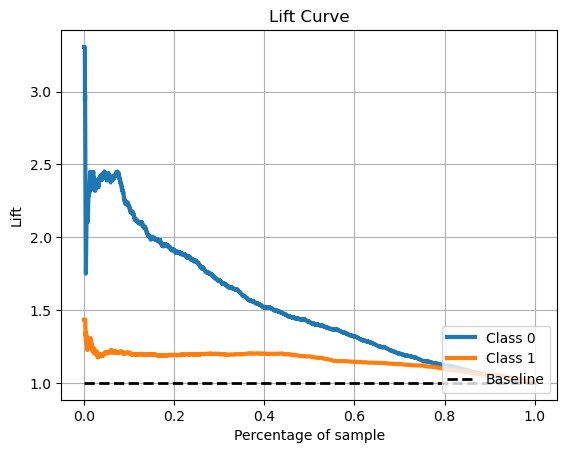

In [137]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scikitplot.metrics as skplt


#create dummies for the categorical variables
knndata = pd.get_dummies(data)
knndata

#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(knndata, target, test_size=0.2, random_state=42)

#train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# q: what does the error "Found input variables with inconsistent numbers of samples:" mean?
# a: the number of rows in the data and target are not the same

#evaluate the model
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

#q: what have we predicted?
# a: we have predicted the final result of the student  (pass, fail, distinction)
#calculate the accuracy, recall and precision
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


#what is precision?
#precision is the amount of true positives divided by the amount of true positives and false positives

#what is recall?
#recall is the amount of true positives divided by the amount of true positives and false negatives


#Calculate the recall and precision
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#calculate the recall
recall = recall_score(y_test, y_pred, average='macro')
print(recall)

#calculate the precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='macro')
print(precision)

y_prob = knn.predict_proba(X_test)

print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("Lift curve:", skplt.plot_lift_curve(y_test, y_prob))

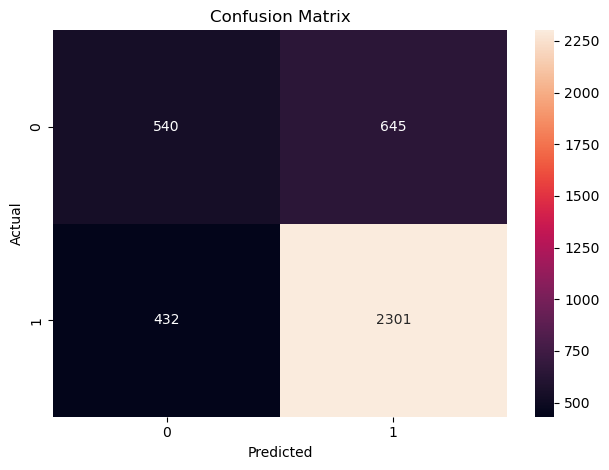

In [138]:
#Now that we have used KNN
#lets try to visualize our results

#Make a graph where we can see what our model predicted and what the actual result was
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#make a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

#make a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


#### Naive Bayes

First load the data then run first and third code block of data mining section

0.6929555895865237
Recall: 0.6761800219538968
Precision: 0.853185595567867
F1 score: 0.7544396815676668
Lift curve: AxesSubplot(0.125,0.11;0.775x0.77)


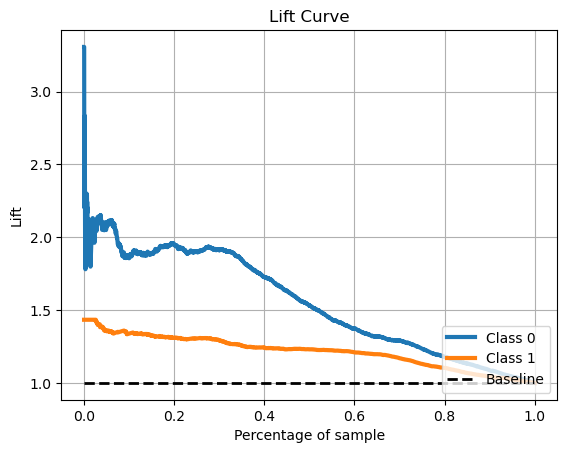

In [139]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import scikitplot.metrics as skplt

#create dummies for the categorical variables
nbdata = pd.get_dummies(data)
nbdata

#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(nbdata, target, test_size=0.2, random_state=42)

#train the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

#evaluate the model
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))

y_prob = gnb.predict_proba(X_test)

print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("Lift curve:", skplt.plot_lift_curve(y_test, y_prob))

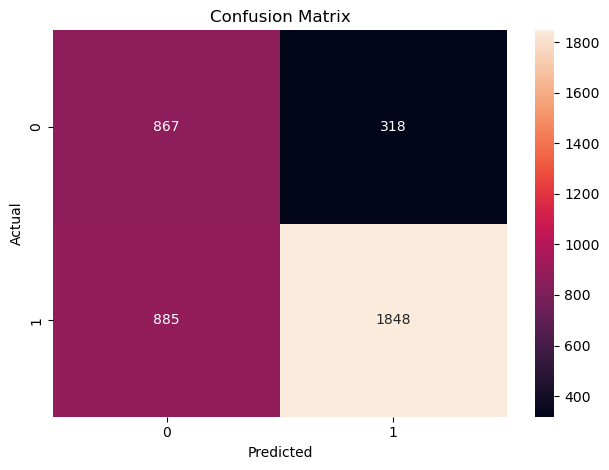

In [140]:
#Now that we have used Naive Bayes, let's try to visualize our results
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#make a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

#make a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

#### Decision Tree

First load the data then run first and third code block of data mining section

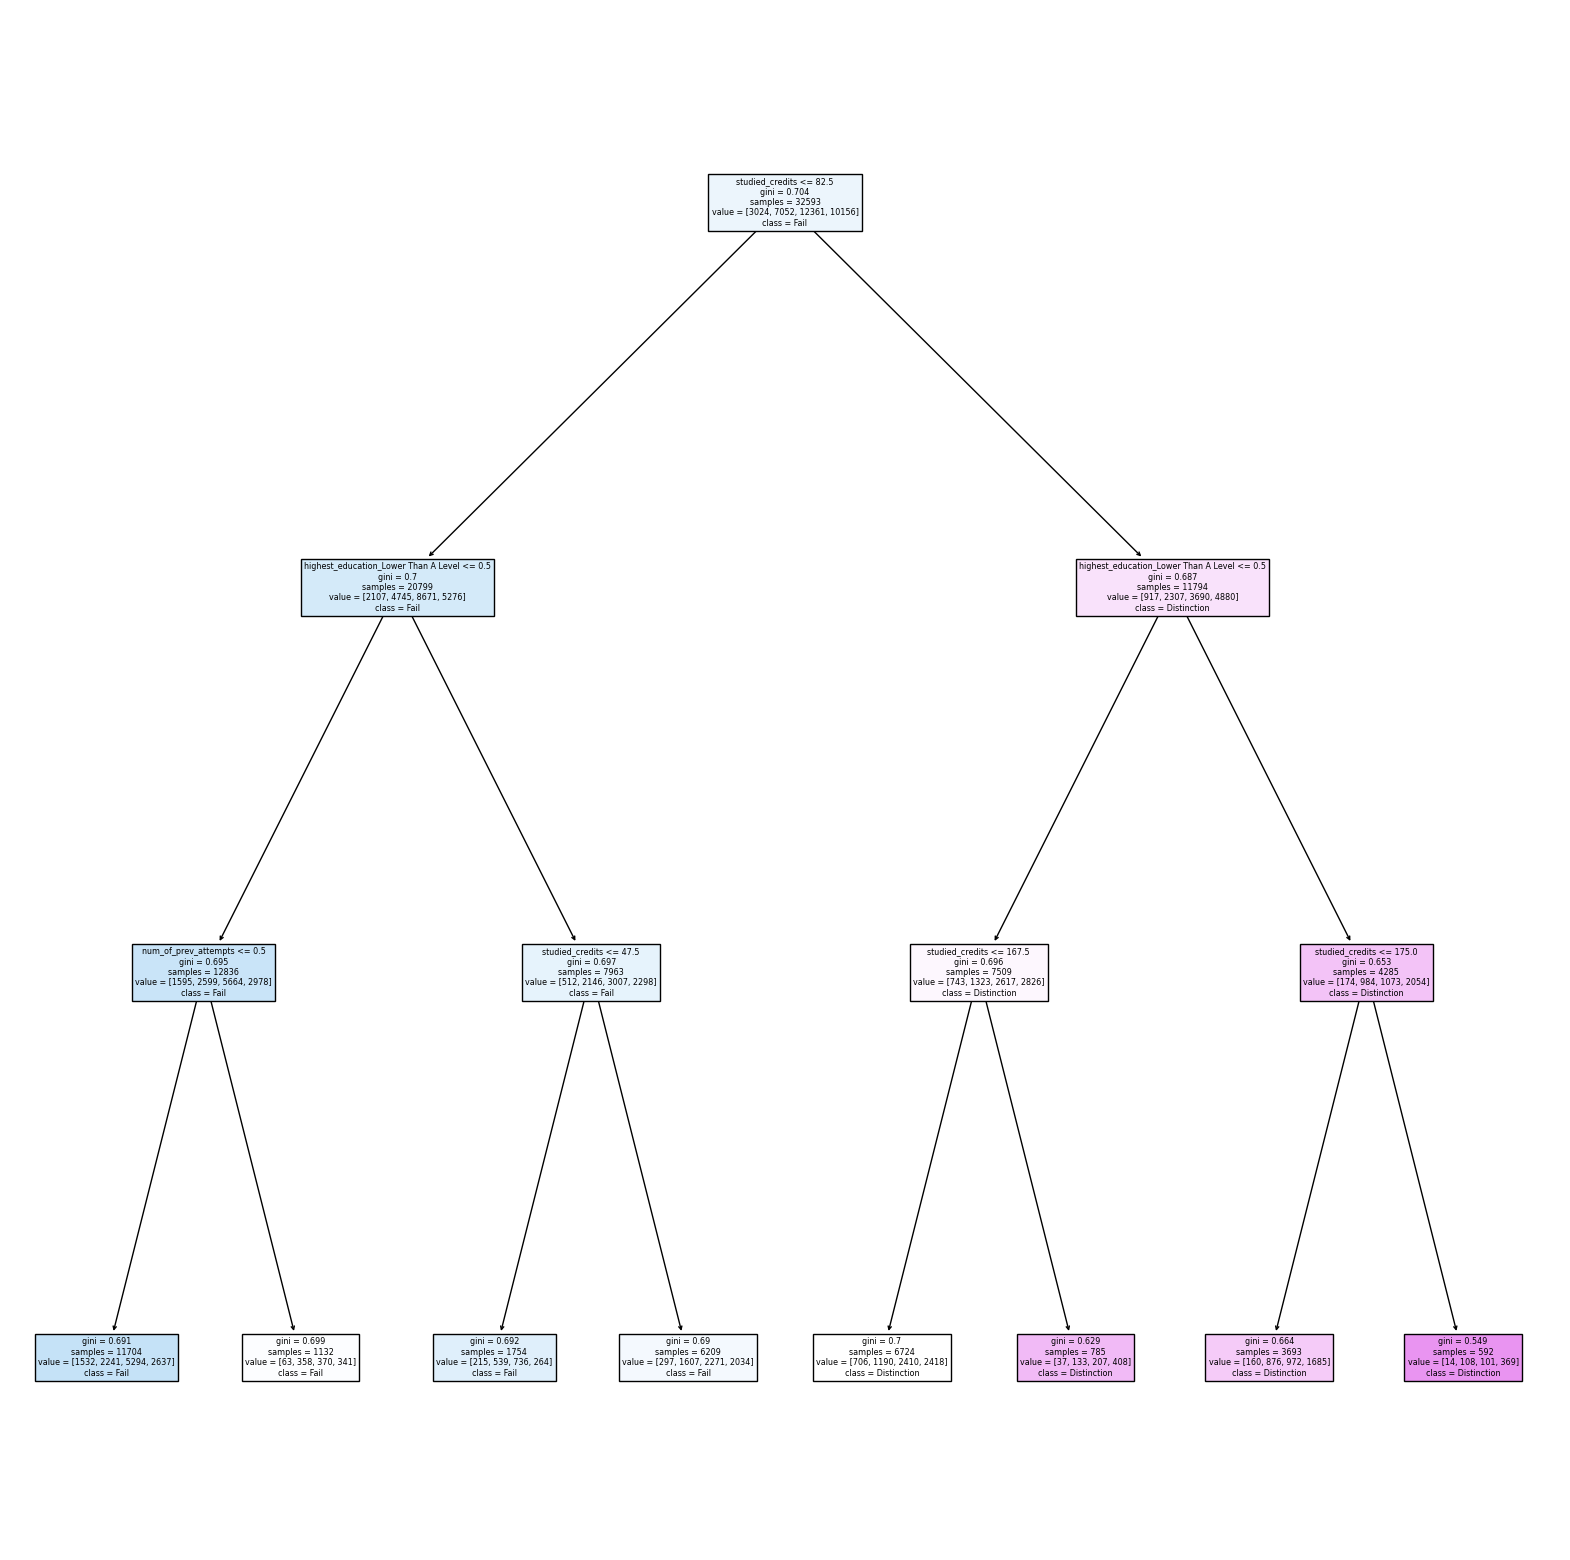

c:\Users\robbe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

 Distinction       0.00      0.00      0.00      3024
        Fail       0.00      0.00      0.00      7052
        Pass       0.42      0.70      0.52     12361
   Withdrawn       0.41      0.48      0.44     10156

    accuracy                           0.42     32593
   macro avg       0.21      0.30      0.24     32593
weighted avg       0.29      0.42      0.34     32593



c:\Users\robbe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\robbe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
#Decision tree classifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#define data (what columns do we want to use?)
#lets use all the columns in studnetInfo except for the final grade,code_module, code_presentation and id_student (since these are not relevant for the model)
data = studentInfo.drop(['final_result', 'code_module', 'code_presentation', 'id_student'], axis=1)
target = studentInfo['final_result']
#data = data.dropna()
data = pd.get_dummies(data)



plt.figure(figsize=(20,20))
#decisiontreeclassifier with max_depth=3
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(data, target)
plot_tree(tree, filled=True, feature_names=data.columns, class_names=target.unique())
plt.show()

#Calculate the recall and precision
from sklearn.metrics import classification_report

y_pred = tree.predict(data)
print(classification_report(target, y_pred))

##### Conclusion of Decision Tree
Students that studied more credits are more likely to pass.

#### AI (not finished but working)  (71,97% accuracy => Dieter, 75,65% accuracy => Jens)


In [ ]:
#Dit was mijn poging tot machine learning maar ik heb geen idee of dit klopt of niet of wat het allemaal betekent
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

aidata = pd.get_dummies(data)

#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(aidata, target, test_size=0.2, random_state=42)

#train the model
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=500)

mlp.fit(X_train, y_train)

#evaluate the model
y_pred = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred))

#print out the most important features
print(mlp.coefs_)
print(mlp.intercepts_)


0.7141398672792241
[array([[-2.45298051e-002, -1.91383303e-002,  1.54334777e-001, ...,
         1.18395818e-002,  1.83268320e-001, -7.48126337e-136],
       [ 1.43506283e-001,  3.77250279e-001,  6.90451586e-002, ...,
         1.44384866e-002,  1.64471781e-002, -1.02197890e-145],
       [ 1.15970036e-001,  9.68380755e-002,  9.64859021e-002, ...,
        -1.20548808e-003,  1.01368990e-001, -5.19428542e-150],
       ...,
       [-1.70878830e-001, -1.16379997e-001,  5.56662984e-002, ...,
         5.38949628e-007, -1.89849141e-001,  6.87426733e-146],
       [ 9.62343265e-002,  1.71113775e-001,  2.46326272e-002, ...,
         9.64943436e-003, -1.04734149e-001,  1.38773221e-157],
       [ 2.19418588e-001,  1.34697971e-001,  6.64892541e-002, ...,
         5.38609387e-003,  2.54440275e-001, -2.02171870e-147]]), array([[-2.20079297e-002,  1.28269794e-001,  8.89920718e-002, ...,
        -1.88568125e-001,  1.09292921e-002, -1.30156219e-001],
       [-2.02292815e-002,  1.55765508e-001, -1.17620965e

Indien we ons model niet kunnen verbeteren kunnen we de vraag veranderen van hoe kunnen we zien welke studenten slagen naar hoe kunnen we predicten welke studenten falen. :
```
[06/12 18:14] Aimee Lynn Backiel
I would look at some other measures. For example, if the majority of students pass, then maybe you want to look at the recall for "failing" students.

[06/12 18:15] Aimee Lynn Backiel
Or a lift curve, if you rank your students according to likelihood of failing, do you have good results in the top 10% of students you think will fail? This means, you might propose a kind of STC person who can contact those "high risk" students to help them better prepare for the semester in hopes they can pass.

```

## Since I can't predict who passes or fails, we can look at other measures. 

### Recall, precision and f1 scores of failing students
We have calculated the recall, precision and f1 scores for KNN and Naive Bayes. <br/>
These scores are shown underneath the corresponding algorithm.

### Recall, precision and F1 score
KNN has the highest recall of failing students, and the highest accuracy. <br/>
The precision however is higher for Naive Bayes. <br/>
Also is the F1 score higher for KNN.<br/>
Now what do these scores mean?

#### Recall
The recall is the ratio `tp / (tp + fn)` where `tp` is the number of true positives and `fn` the number of false negatives. <br/>
The recall is intuitively the ability of the classifier to find all the positive samples.<br/>
The recall is also known as *sensitivity* or *true positive rate*. If there are no false negatives, the recall is equal to the precision.<br/>
The best value is 1 and the worst value is 0.<br/>
In this case, the recall is the percentage of students that failed found by the model.<br/>

#### Precision
The precision is the ratio `tp / (tp + fp)` where `tp` is the number of true positives and `fp` the number of false positives. <br/>
The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.<br/>
The precision is also known as *positive predictive value*.<br/>
The best value is 1 and the worst value is 0.<br/>
In this case, the precision is the percentage of students who were predicted to fail and actually failed.<br/>

#### F1 score
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. <br/>
The relative contribution of precision and recall to the F1 score are equal. <br/>
The formula for the F1 score is:
```F1 = 2 * (precision * recall) / (precision + recall)```<br/>
In the multi-class and multi-label case, this is the weighted average of the F1 score of each class.<br/>
In this case, the F1 score is the harmonic mean of the precision and recall.<br/>
The higher the F1 score, the better.<br/>
This is because the F1 score is the harmonic mean of the precision and recall, which means that it only takes into account the best of the two.<br/>

### Likelyhood of students failing


This has already been done in absolute numbers for the KNN and Naive Bayes models.